In [1]:
# change your directory name
include("../function/RCWA_2D_new.jl")
include("../function/RCWA_2D.jl")
include("../function/fft_permittivity.jl")
include("../function/K_calc.jl")
include("../function/homogeneous_eigen.jl")
include("../function/S_calc.jl")
include("../function/P_Q_calc.jl")
include("../function/layer_eigen.jl")
include("../function/Redheffer_star.jl")
include("../function/Pol_Cin_calc.jl")
include("../function/Toeplitz_make.jl")
include("../function/Toeplitz_x_to_y.jl")
include("../function/Toeplitz_y_to_x.jl");

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


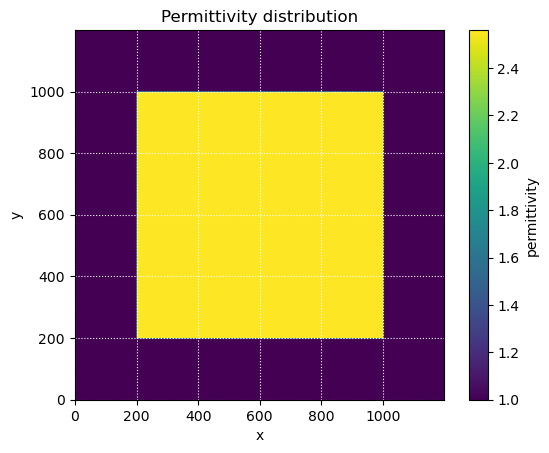

In [2]:
P = 2

Nx = 1200
Ny = 1200
x_start = 200
y_start = 200
x_end = 1000
y_end = 1000
n = 1.6 ^2
angle = 0

E_2_1 = Toeplitz_matrix_x_to_y(Nx, Ny, x_start, x_end, y_start, y_end, n, angle, P);

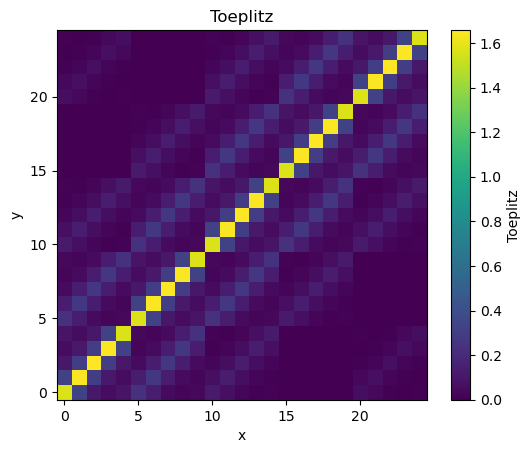

In [3]:
PyPlot.imshow(abs.(E_2_1), cmap="viridis", origin="lower")
PyPlot.colorbar(label="Toeplitz")
PyPlot.xlabel("x")
PyPlot.ylabel("y")
#PyPlot.grid(true, linestyle="dotted", color="white")
PyPlot.title("Toeplitz")
PyPlot.show()

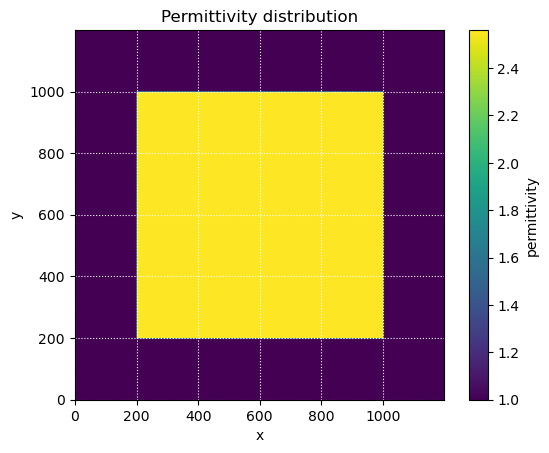

In [4]:
# angle = 90度より無し

E_2_2 = Toeplitz_matrix_y_to_x(Nx, Ny, x_start, x_end, y_start, y_end, n, P, angle);

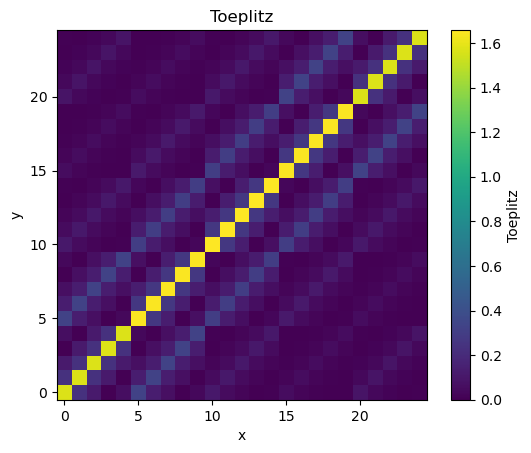

In [5]:
PyPlot.imshow(abs.(E_2_2), cmap="viridis", origin="lower")
PyPlot.colorbar(label="Toeplitz")
PyPlot.xlabel("x")
PyPlot.ylabel("y")
#PyPlot.grid(true, linestyle="dotted", color="white")
PyPlot.title("Toeplitz")
PyPlot.show()

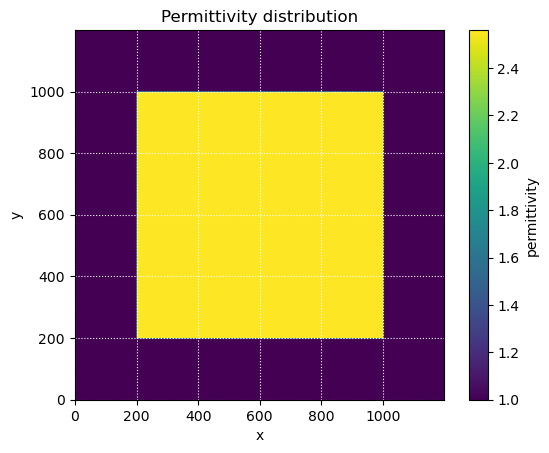

In [6]:
F_2 = Fourier_permittivity(Nx, Ny, x_start, x_end, y_start, y_end, n, angle);

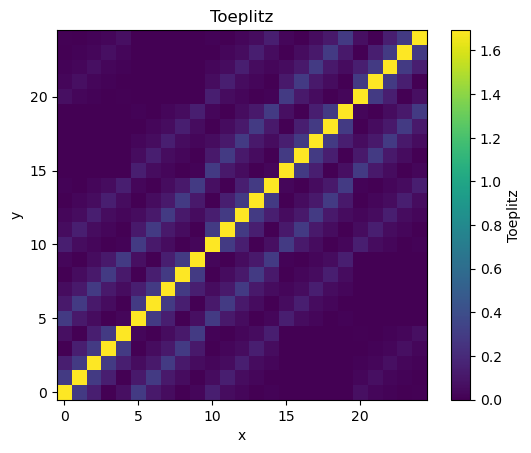

In [7]:
# making Toeplitz P=Q 
Q = P

E_1_1 = 1.6^2 * Matrix(I, (2*P + 1)*(2*Q + 1), (2*P + 1)*(2*Q + 1));

E_2 = toeplitz(F_2, P, Q);

E_matrix_1 = []

E_matrix_2 = []

E_matrix = []

push!(E_matrix, E_2)

push!(E_matrix, E_1_1)

push!(E_matrix, E_2);

push!(E_matrix_1, E_2_1)

push!(E_matrix_1, E_1_1)

push!(E_matrix_1, E_2_1);

push!(E_matrix_2, E_2_2)

push!(E_matrix_2, E_1_1)

push!(E_matrix_2, E_2_2);

PyPlot.imshow(abs.(E_2), cmap="viridis", origin="lower")
PyPlot.colorbar(label="Toeplitz")
PyPlot.xlabel("x")
PyPlot.ylabel("y")
PyPlot.title("Toeplitz")
PyPlot.show()

In [8]:
# running 2D_RCWA
θ = 40
ϕ = 0
Λx = 12
Λy = 12
d = [5 8 5]
Φ = 0;

In [9]:
pp = collect(0:199) # GHz

syu = (2.9979e+05 ./ ((1 .+ pp./ 1))) .* 10^-3

#299792458 = 2.9979 * 10 ^8 m/s
#299792458 * 10 ^-3 = 2.9979 * 10 ^5 mm/s
#299792458 * 10 ^-6　 = 2.9979 * 10 ^2 μm/s

nu = 1 .+ pp./ 1

function RCWA2D_run(λ_1, θ, ϕ, Λx, Λy, d, E_matrix, E_matrix_1, E_matrix_2, N, M, Φ,)
    
    Tl = zeros(length(λ_1))

    Tp_0_0 = zeros(length(λ_1))
    
    @inbounds for (i, λ_2) in enumerate(λ_1)
        
        R, Tl[i], Tp, Tp_0_0_matrix = RCWA2D_new(λ_2, θ, ϕ, Λx, Λy, d, E_matrix, E_matrix_1, E_matrix_2, N, M, Φ)

        Tp_0_0[i] = Tp_0_0_matrix[Int(((2N+1)^2+1)/2)]

    end

    return Tl, Tp_0_0
        
end

@time Tl, Tp_0_0 = RCWA2D_run(syu, θ, ϕ, Λx, Λy, d, E_matrix, E_matrix, E_matrix, P, Q, Φ);
@time Tl_1, Tp_0_0_1 = RCWA2D_run(syu, θ, ϕ, Λx, Λy, d, E_matrix, E_matrix_1, E_matrix_2, P, Q, Φ);

  7.370759 seconds (18.31 M allocations: 3.484 GiB, 5.20% gc time, 76.10% compilation time)
  1.641876 seconds (359.04 k allocations: 2.325 GiB, 5.48% gc time)


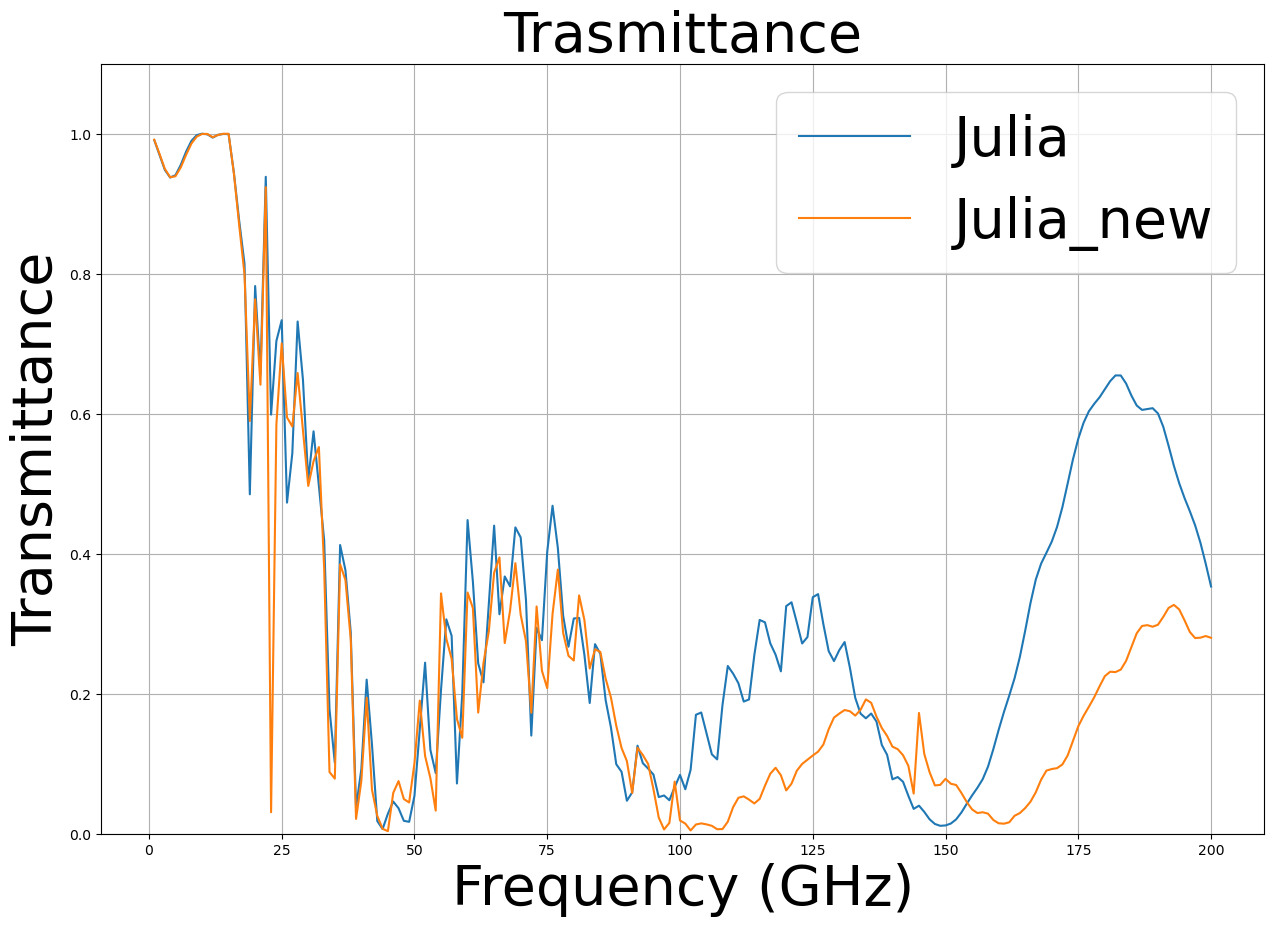

In [10]:
fig = PyPlot.figure()

fig.set_figheight(10)
fig.set_figwidth(15)

#PyPlot.plot(nu, Tl,label ="Julia")
#PyPlot.plot(nu, Tl_1,label ="Julia_new")

PyPlot.plot(nu, Tp_0_0,label ="Julia")
PyPlot.plot(nu, Tp_0_0_1,label ="Julia_new")

PyPlot.xlabel("Frequency (GHz)", fontsize=40)
PyPlot.ylabel("Transmittance", fontsize=40)
PyPlot.grid()
PyPlot.legend(fontsize=40)
PyPlot.title("Trasmittance", fontsize=40)
PyPlot.ylim(0,1.1)
#PyPlot.xlim(100, 140)
PyPlot.show()

In [11]:
using PyCall
np = pyimport("numpy")

TT = np.load("../material/test1_N_2_in_40.npy");
TT = (np.abs(TT)).^2;

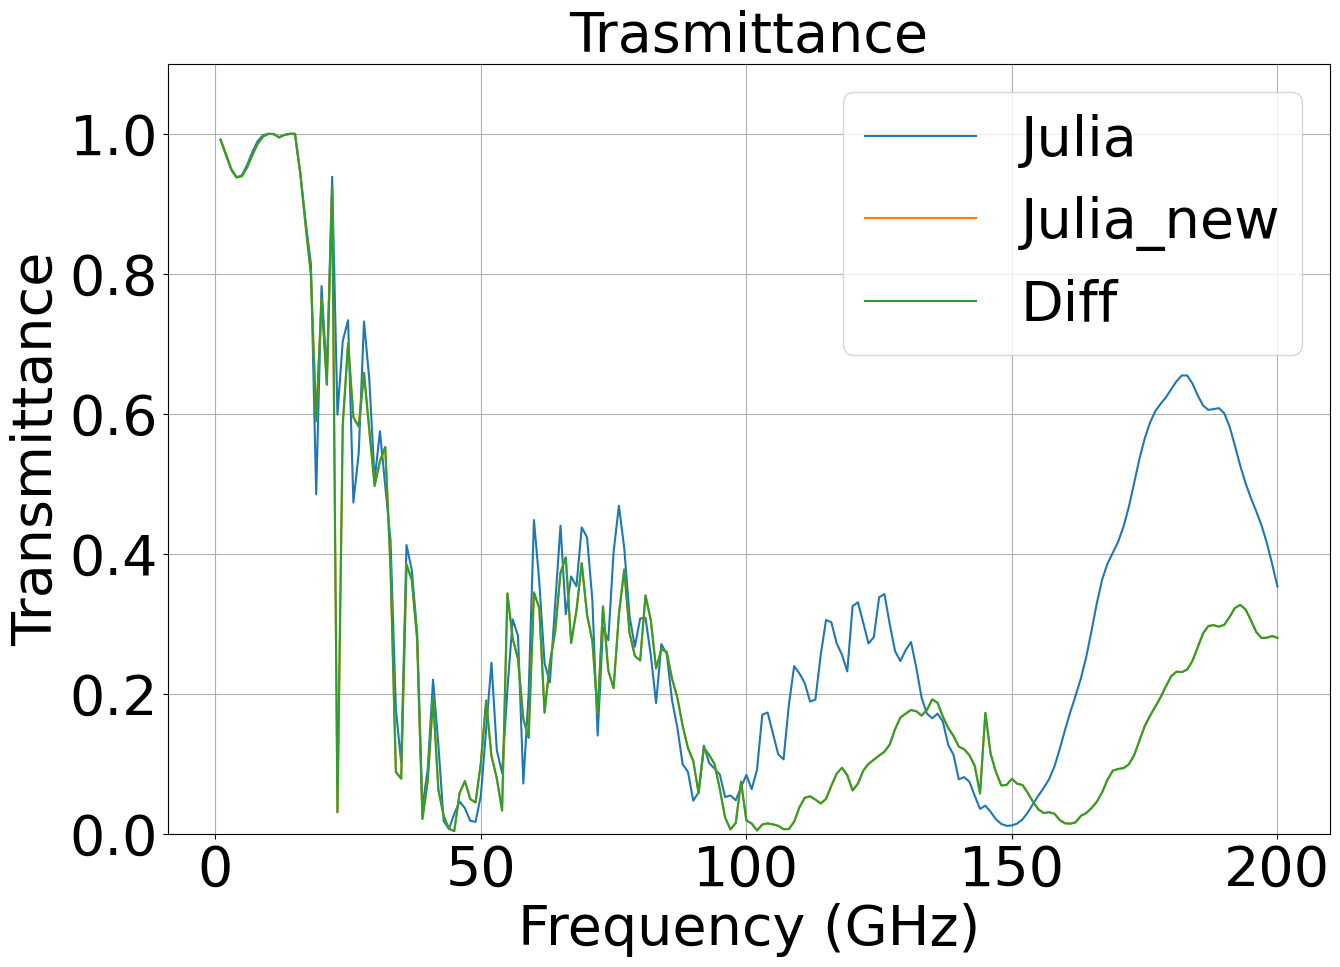

In [12]:
fig = PyPlot.figure()

fig.set_figheight(10)
fig.set_figwidth(15)

PyPlot.plot(nu, Tp_0_0,label ="Julia")
PyPlot.plot(nu, Tp_0_0_1,label ="Julia_new")
PyPlot.plot(nu, TT,label ="Diff")

PyPlot.xlabel("Frequency (GHz)", fontsize=40)
PyPlot.ylabel("Transmittance", fontsize=40)
PyPlot.grid()
PyPlot.legend(fontsize=40)
PyPlot.tick_params(labelsize=40)
PyPlot.title("Trasmittance", fontsize=40)
PyPlot.ylim(0,1.1)
#PyPlot.xlim(100, 140)
PyPlot.show()

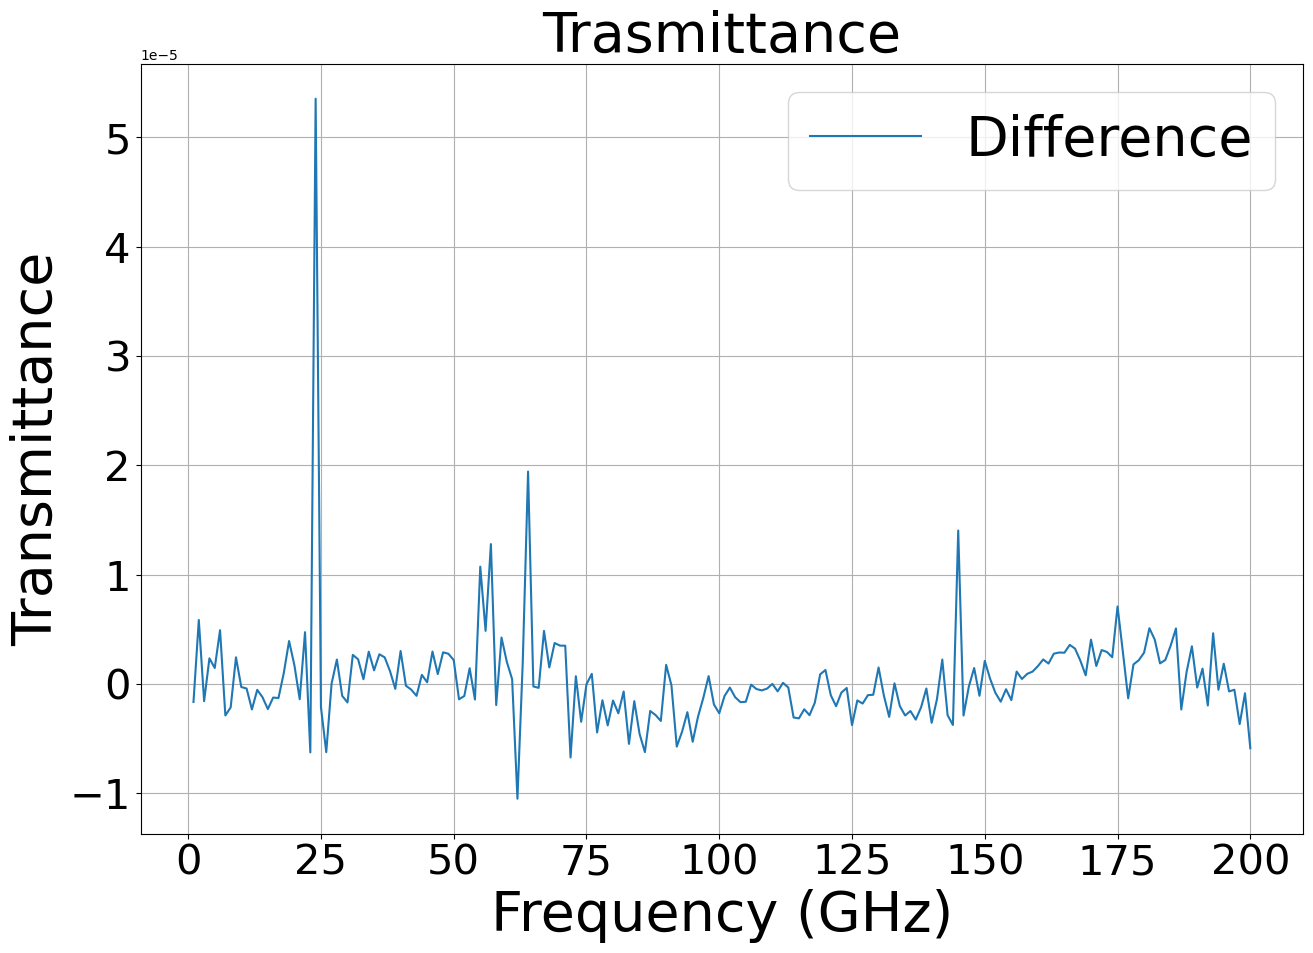

In [13]:
fig = PyPlot.figure()

fig.set_figheight(10)
fig.set_figwidth(15)

PyPlot.plot(nu, TT - Tp_0_0_1,label ="Difference")


PyPlot.xlabel("Frequency (GHz)", fontsize=40)
PyPlot.ylabel("Transmittance", fontsize=40)
PyPlot.grid()
PyPlot.legend(fontsize=40)
PyPlot.title("Trasmittance", fontsize=40)
PyPlot.tick_params(labelsize=30)
#PyPlot.ylim(0,1.1)
#PyPlot.xlim(170, 200)
PyPlot.show()